<center><h1> Exploratory Data Analysis & Visualization </h1>
    <h2> Rebecca Hinrichs </h2>
    <h4> Data Mining </h4></center>

***

We are interested in exploring the features available to us in the data set 'BDParkinson_Prediction.csv' which contains data collected for patients of Parkinson's Disease. Using a variety of techniques built into Python's Pandas, NumPy, and Matplotlib libraries, we will examine this data set using techniques of Exploratory Data Analysis, and discuss our results.

***

## *** Analysis of the Data ***
To begin, we will wrangle the data provided in the data set to explore the nature of the dataset.

***

In [1]:
# Import libraries & dependencies
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the Data
data = pd.read_csv('BDParkinson_Prediction.csv')
print('\nOur data set contains', data.shape[0], 'rows and', data.shape[1], 'columns.')
print('\nThe names of our', data.shape[1], 'variables (features) are:')
[print(i) for i in data.columns]


Our data set contains 500 rows and 7 columns.

The names of our 7 variables (features) are:
VAR1
VAR2
VAR3
VAR4
VAR5
VAR6
CLASS


[None, None, None, None, None, None, None]

In [3]:
# Summarizing the Data
print('\nWe can get a snapshot of the first 5 rows of the data available using head().')
print('From this small sample we can estimate how each feature was recorded.')
print('Notice \'VAR3\' contains several 0.0 values. More on that later...')
data.head()


We can get a snapshot of the first 5 rows of the data available using head().
From this small sample we can estimate how each feature was recorded.
Notice 'VAR3' contains several 0.0 values. More on that later...


,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,CLASS
0,0.624731,0.135424,0.0,0.675282,0.182203,0.962960,Class_1
1,0.647223,0.136211,0.0,0.679511,0.195903,0.987387,Class_1
2,0.706352,0.187593,0.0,0.632989,0.244884,0.991182,Class_1
3,0.680291,0.192076,0.0,0.651786,0.233528,0.991857,Class_1
4,0.660104,0.161131,0.0,0.677162,0.209531,0.991066,Class_1


At this point, it would be important to understand how the '0.0' values were created. Are these potentially missing (*N/A*) values? Or were these '0' measurements that the researchers intended to include? The answers to these questions could be important in comparing our averages or minimum values. For this reason, data exploration integrated with an open line of communication with the client / data gatherer may be ideal!

In [4]:
num_zeros = data.loc[data.values==0.0]
print('\nThere are a total of',num_zeros.shape[0],'zero values in our dataset... worth asking about!\n')


There are a total of 123 zero values in our dataset... worth asking about!



In [5]:
print('\nWe can also get a summarized statistics report of each feature using describe().')
print('From this summary we can witness the size difference between averages of each variable.')
# print('Notice the largest difference of averages we see is:\n')
# print(data.columns.values[0],': mean',data[0].mean())
# print(data.columns.values[1],': mean',data[1].mean())
# print('Notice the largest difference of averages we see is:\n')
# print('Difference:: ', (data[0].mean()-data[1].mean()))
data.describe()


We can also get a summarized statistics report of each feature using describe().
From this summary we can witness the size difference between averages of each variable.


,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.735121,0.197308,0.467928,0.696034,0.282903,0.314853
std,0.075174,0.068170,0.302631,0.144894,0.105843,0.391511
min,0.613236,0.109302,0.000000,0.515038,0.140636,0.045782
25%,0.671658,0.134198,0.274775,0.576128,0.216137,0.090241
50%,0.716317,0.218196,0.527671,0.642387,0.268986,0.102930
75%,0.805635,0.246461,0.585586,0.737429,0.341426,0.616969
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
print('\nFinally, we can evaluate the distribution of each \'Class\' feature using groupby().')
print('We see an even distribution of our 500 records into 4 classes at 125 records apiece.')
data.groupby('CLASS').size()


Finally, we can evaluate the distribution of each 'Class' feature using groupby().
We see an even distribution of our 500 records into 4 classes at 125 records apiece.


CLASS
Class2     125
Class_1    125
Class_3    125
Class_4    125
dtype: int64

In [7]:
data1 = data.loc[data['CLASS']=='Class_1']
data2 = data.loc[data['CLASS']=='Class2']
data3 = data.loc[data['CLASS']=='Class_3']
data4 = data.loc[data['CLASS']=='Class_4']
print('\nThe size of our four classes together is', \
      len(data1)+len(data2)+len(data3)+len(data4))
data_classes = [data1, data2, data3, data4]


The size of our four classes together is 500


***

## *** Visualization of the Data ***
Now we'll take a look at the data using data visualization techniques in order to observe any interesting disparities between the features and their classes.

***


First we'll compare the distributions of the variables separately.


array([[<AxesSubplot:title={'center':'VAR1'}>,
        <AxesSubplot:title={'center':'VAR2'}>],
       [<AxesSubplot:title={'center':'VAR3'}>,
        <AxesSubplot:title={'center':'VAR4'}>],
       [<AxesSubplot:title={'center':'VAR5'}>,
        <AxesSubplot:title={'center':'VAR6'}>]], dtype=object)

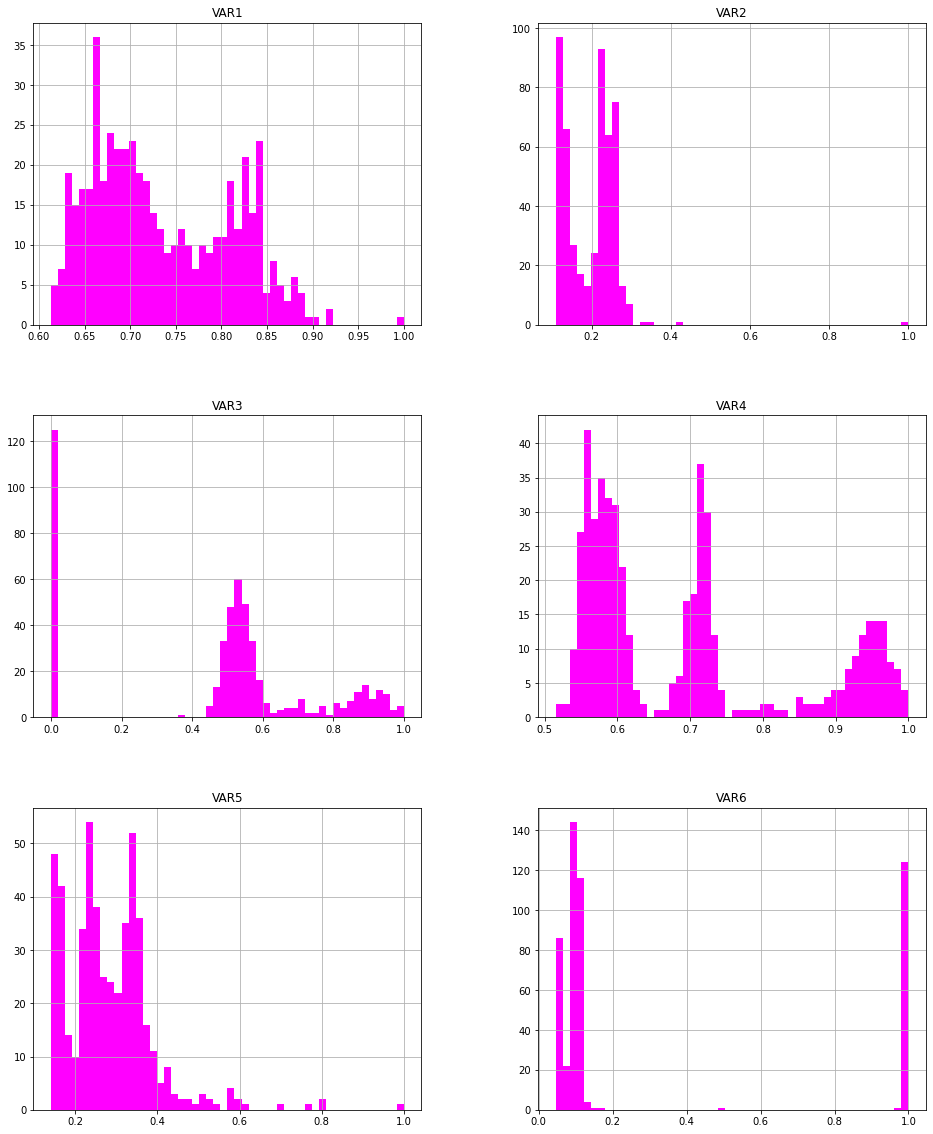

In [8]:
print('\nFirst we\'ll compare the distributions of the variables separately.')
data.hist(figsize=(16,20), bins=50, xlabelsize=10, ylabelsize=10, color='magenta')

All six variables have remarkably different histograms. Three- namely `VAR1`,`VAR2` and `VAR5`- appear to be relatively similar, while the other three- `VAR3`,`VAR4`, and `VAR6` have a significant spread. `VAR6` appears to be the outlier with the most polarized distribution of the six. We can immediately see the utility of observing our data through the lens of visualization of the features. From this perspective, we could continue to explore more questions of the data. We could group the two distribution types and explore more patterns of similarity and disparity per group, for example. Another question arising from this visual sampling is why the high counts of polar disparity for `VAR6`, the low counts of polar disparity for `VAR1`, and our question remains regarding the '0.0' values of `VAR3`- they make up more than double the count of the largest-count histogram variable in that set; should they be bypassed and we re-examine the distribution of this variable? How will it then compare to the others?


Next we'll take a look at the variables in relation to their class distributions.


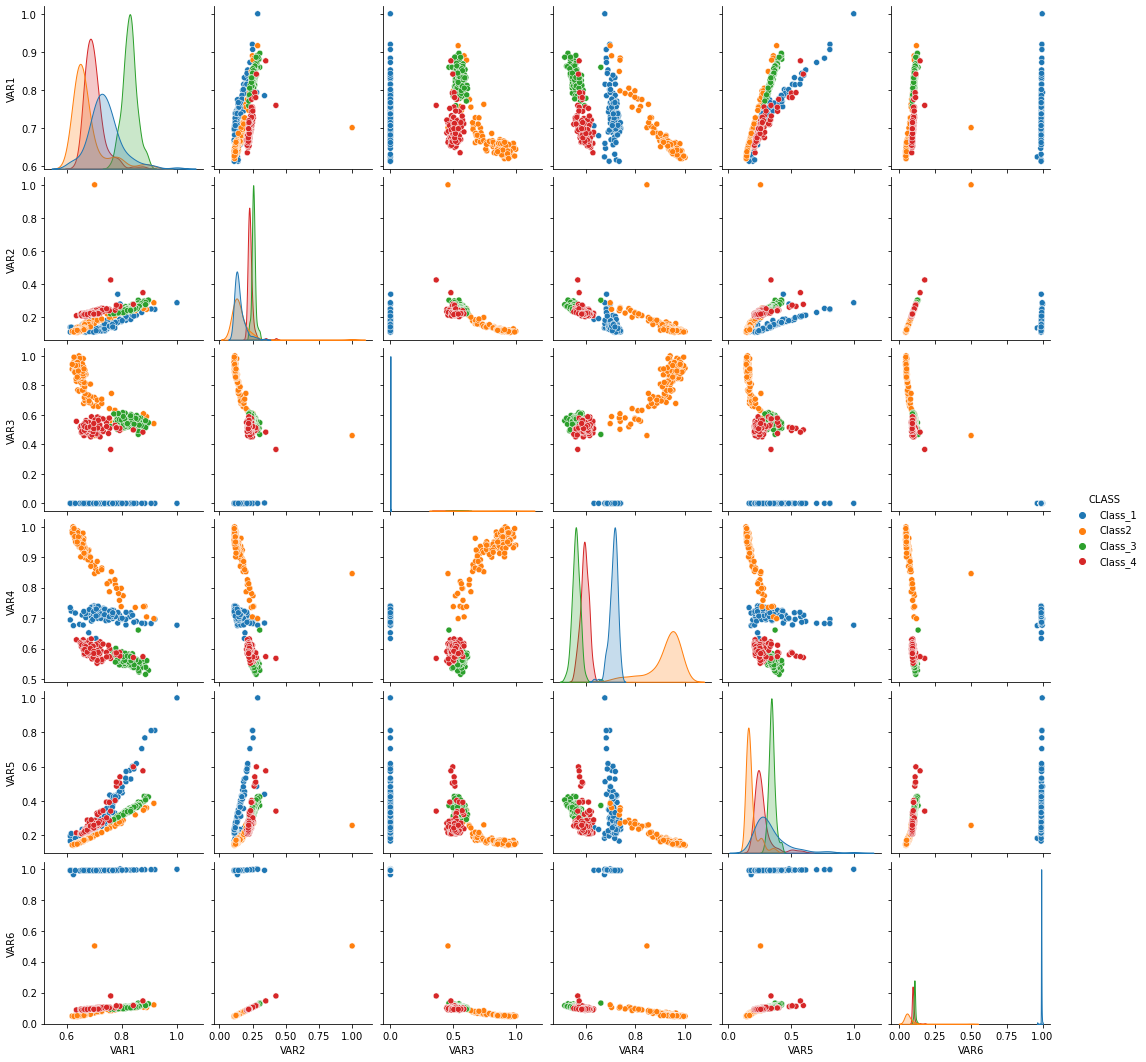

In [9]:
print('\nNext we\'ll take a look at the variables in relation to their class distributions.')
sns.pairplot(data, hue = 'CLASS')

From this perspective we can see significant relationships of `Class_1` variables from most other classes combined across all variables. We also can observe clustering patterns of the classes at the intersection, for example, of `VAR1` and `VAR4`. Similarly we see outlying clusters of `Class2` among several variables while we don't have a single representation on our pairplot of `Class_3` being wholly separated from `Class_4` in distribution. From this we can conjecture and further explore correlation patterns between certain variables and classes of interest.


Below we will explore a Multivariate Plot representing the interactions between the variables.


<AxesSubplot:>

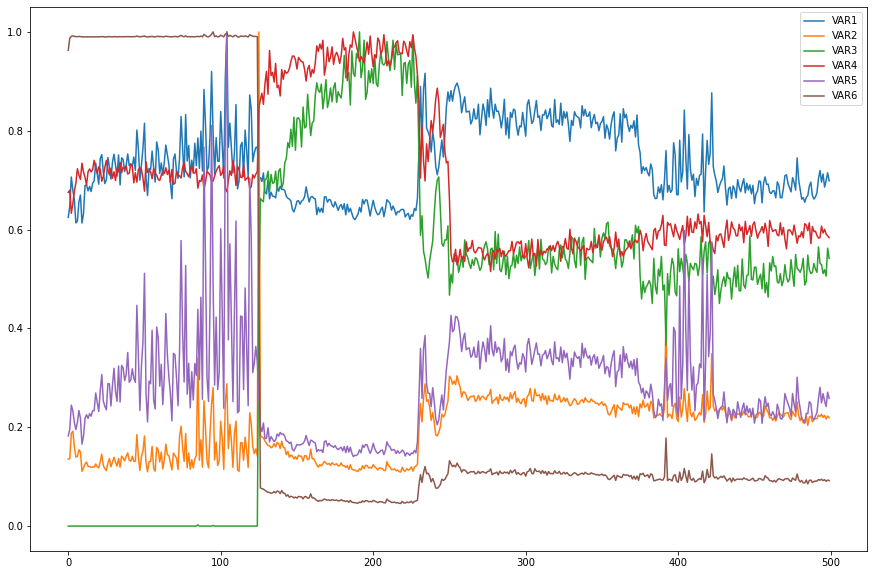

In [10]:
print('\nBelow we will explore a Multivariate Plot representing the interactions between the variables.')
data.plot(figsize=(15,10))


We can further break this up to demonstrate disparities in the weights of distribution.


VAR1       AxesSubplot(0.125,0.536818;0.227941x0.343182)
VAR2    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
VAR3    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
VAR4          AxesSubplot(0.125,0.125;0.227941x0.343182)
VAR5       AxesSubplot(0.398529,0.125;0.227941x0.343182)
VAR6       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

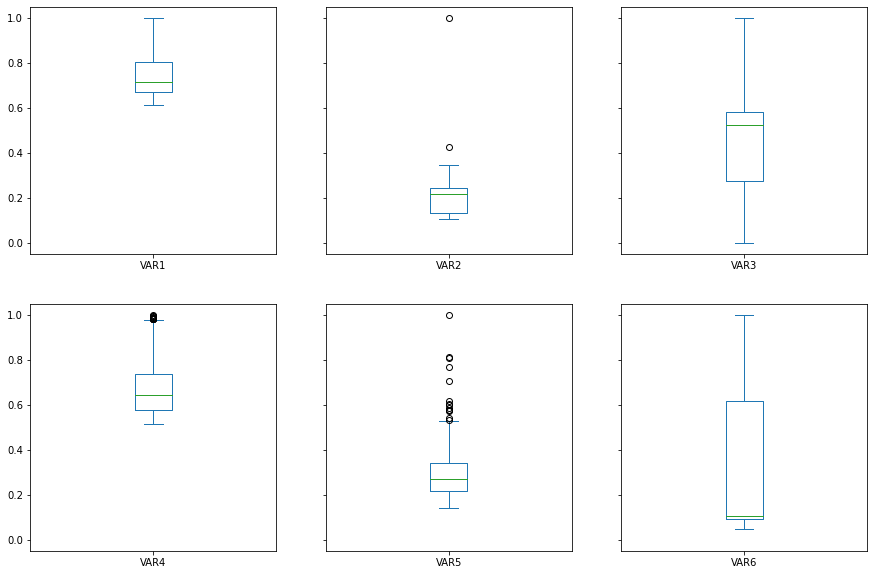

In [11]:
print('\nWe can further break this up to demonstrate disparities in the weights of distribution.')
data.plot(figsize=(15,10), kind='box', subplots=True, layout=(2,3), sharex=False, sharey=True)


Finally, we can explore the correlation between the variables using a heatmap.


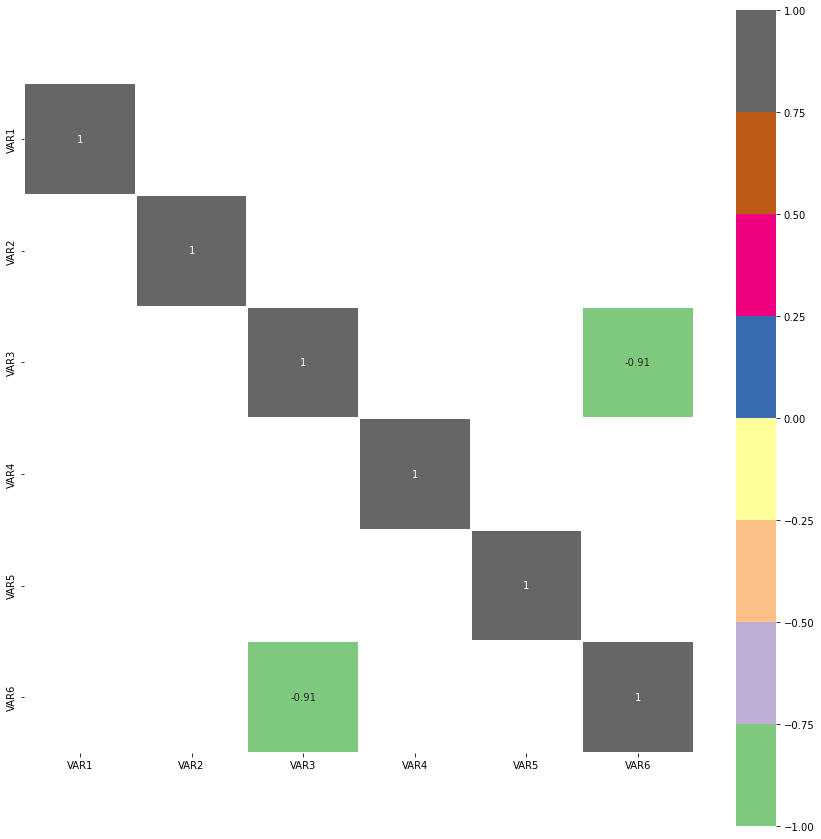

In [14]:
print('\nFinally, we can explore the correlation between the variables using a heatmap.')
data_num = data.drop('CLASS', axis=1)
corr = data_num.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr[(corr >= 0.9) | (corr <= -0.9)], cmap='Accent', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={"size": 10}, square=True);


It appears there is a significant relationship between `VAR3` and `VAR6`.